# Data visulisation by "matplotlib" and "plotly" in Jupyter

Codes in this notebook support the paper titled as "Parallel-over-series fusion model for predicting internal temperature of Xiluodu arch dam (溪洛渡拱坝内部温度预测的串并混联融合模型)". 
Hopefully, it can help people improve the figure qulitiy in their papers. 
The codes used in the original paper were written in R by "ggplot2", I have rewrite everything here in Python by "matplotlib" and "plotly".  
Data sets are not provided here, however, they can be obtained from "State Key Laboratory of Hydroscience and Engineering, Tsinghua University, Beijing". Cantact: Prof. Hu.

This section is described in two parts: <br>
Part1: Install and import required packages. <br>
Part2: Generate firues based on the corresponding index.

# Install and import required packages

In [3]:
# !pip install pyreadr
import pyreadr  # Import a library that helps read ".Rdata" files in Python.
import os
if not os.path.exists("images"):
    os.mkdir("images") # Create a folder call "images"

In [4]:
# !pip install matplotlib
import matplotlib.pyplot as plt

In [16]:
# !pip install plotly
import plotly.graph_objs as go

In [ ]:
# !pip install seaborn
import seaborn as sns

In [ ]:
# !pip install pandas
import pandas as pd

## Generate figures based on the corresponding index.

### Fig 2

In [6]:
Fig2 = pyreadr.read_r('Fig2.Rdata') # Upload "fig2.Rdata" to the local path.
Fig2.keys() # Check the names of all DataFrame imported from Rdata.

odict_keys(['shape16', 'lo_16langdao1', 'lo_all'])

In [7]:
shape16 = Fig2["shape16"]
# This variable stores the coordinates of the Xiluodu (XLD) dam vertical section 16#.
lo_16langdao1 = Fig2["lo_16langdao1"]
# This variable contains the locations(coordinates) of 5 XLD garlleries
lo_all = Fig2["lo_all"]
# lo_all is the locations of all thermometers in Section 16.

/Users/maxandchang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning:

Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.



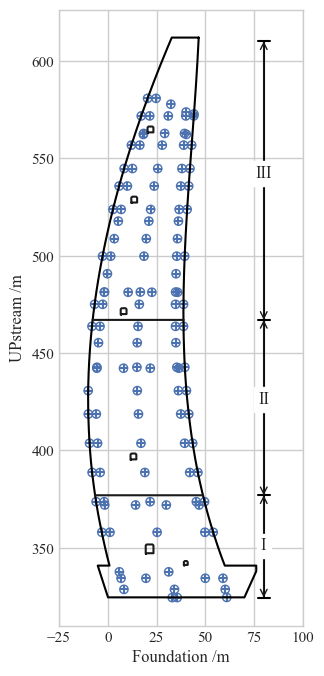

In [810]:
plt.style.use('seaborn-whitegrid')
plt.rcParams["font.family"] = "Times New Roman"
plt.scatter('x', 'y', data = lo_all, marker = "+", c = 'b')
plt.scatter('x', 'y', data = lo_all, facecolors='none',edgecolors='b')
plt.plot('x',    'y', data = shape16, c = "black", linestyle='-')
plt.plot("Col1", "Col2", data = lo_16langdao1, c = "k",linestyle='-')
plt.plot([77,83],[610,610], color = 'black') # y = 610 the top height of Section III
plt.plot([77,83],[467,467], color = 'black') # y = 467 the top height of Secetion II
plt.plot([77,83],[377,377], color = 'black') # y = 467 the top height of Secetion I
plt.plot([77,83],[324.5,324.5], color = 'black') # y = 467 the bottom height of Secetion I
plt.plot([80,80],[324.5,610], color = 'black')
plt.annotate("",
            xy=(80, 610), xycoords='data',
            xytext=(80, 467), textcoords='data',
            arrowprops=dict(arrowstyle="<->", shrinkA =0, shrinkB=0, color='k',lw =1),
            )
plt.annotate("",
            xy=(80, 377), xycoords='data',
            xytext=(80, 467), textcoords='data',
            arrowprops=dict(arrowstyle="<->", shrinkA =0, shrinkB=0, color='k',lw =1),
            )
plt.annotate("",
            xy=(80, 377), xycoords='data',
            xytext=(80, 324.5), textcoords='data',
            arrowprops=dict(arrowstyle="<->", shrinkA =0, shrinkB=0, color='k',lw =1),
            )
plt.text(80,538, "III",fontsize=12, bbox={'facecolor': 'white','pad': 3, 'edgecolor' : "white"},ha='center', va = 'bottom')
plt.text(80,422, "II", fontsize=12, bbox={'facecolor': 'white','pad': 3, 'edgecolor' : "white"},ha='center', va = 'bottom')
plt.text(80,347, "I",  fontsize=12, bbox={'facecolor': 'white','pad': 3, 'edgecolor' : "white"},ha='center', va = 'bottom')
plt.xlabel('Foundation /m')
plt.ylabel('UPstream /m')
plt.axis('scaled')
plt.xlim(-25,100)
plt.gcf().set_size_inches(4, 8)
plt.savefig('images/FusionModel_Fig2.png', dpi=300) # Use "dpi" to increase the resolution of the saved figure.

### Fig3

In [9]:
Fig3 = pyreadr.read_r('Fig3.Rdata')
Fig3.keys() # Check the names of all DataFrame imported from Rdata.

odict_keys(['ptsl_idw_df_inout_shape16', 'lo_opt_bound', 'lo_y0_opt', 'lo_corridor16'])

In [10]:
ptsl_idw_df_inout_shape16 = Fig3["ptsl_idw_df_inout_shape16"]
ptsl_idw_df_inout_shape16 = ptsl_idw_df_inout_shape16.rename({'var1.pred': 'Temperature'}, axis=1) 
# Coordinates of dam inner temperatures on the initial date, wich is 2014-07-01 used in the paper.
lo_opt_bound = Fig3["lo_opt_bound"]
# Location of thermometers served as the boundary condition of the Camp Chian inversion algorithm.
lo_y0_opt = Fig3["lo_y0_opt"]
# Location of thermometers served as verifications of the Camp Chian inversion algorithm.
lo_corridor16 = Fig3["lo_corridor16"]
# Rough locations of dam galleries for labeling purpose.

In [9]:
!pip install kaleido
import kaleido

In [14]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

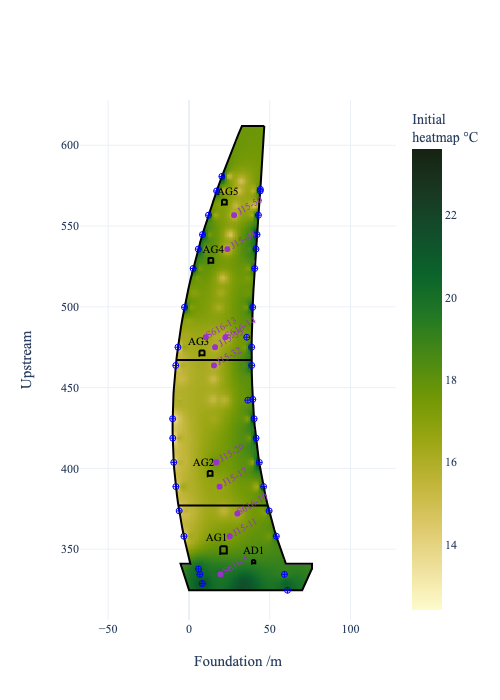

In [13]:
fig = go.Figure(
    go.Heatmap(
        x=ptsl_idw_df_inout_shape16['x'], 
        y=ptsl_idw_df_inout_shape16['y'], 
        z=ptsl_idw_df_inout_shape16['Temperature'], 
        colorscale='speed',
        colorbar=dict(title='Initial <br>heatmap /°C')
    )
) # Generate the heatmap of dam concrete on the initial calculation day.

fig.add_trace(
    go.Scatter(
        x=shape16["x"],
        y=shape16["y"],
        line=dict(color="black"),
        showlegend=False
    )
) # Add the dam boundary in black color.

fig.add_trace(
    go.Scatter(
        x=lo_16langdao1["Col1"],
        y=lo_16langdao1["Col2"],
        line=dict(color="black"),
        showlegend=False
    )
) # Add the dam garlleries in black color.

fig.add_trace(
    go.Scatter(
    x=lo_corridor16["x"],
    y=lo_corridor16["y"]+8,
    mode="text",
    text=lo_corridor16["index"],
    textfont=dict(
        size=11,
        color="black"
    ),
    #textfont_size=11,
    showlegend=False
    )
) # Mark names of the galleries.

# create annotations iteratively for each thermometer
for i, val in enumerate(lo_y0_opt["x"]): 
    fig.add_annotation(
        x = lo_y0_opt["x"][i], 
        y = lo_y0_opt["y"][i], 
        text = lo_y0_opt["index"][i],
        showarrow=False,
        textangle=-30,
        xshift=15,
        yshift=10,
        font=dict(color='darkorchid', size=10))
# Indices of verification thermometers. Use add_annotation to chang text angles. Unfortunately, I haven't find an easy 
# way to generate text in batches. So a for loop has been used.

fig.add_trace(
    go.Scatter(
        x=lo_opt_bound["x"],
        y=lo_opt_bound["y"],
        mode="markers",
        marker_symbol="circle-cross-open",
        marker=dict(color="blue"),
        showlegend=False
    )
) # Add the boundary conditions of the inverse problem.

fig.add_trace(
    go.Scatter(
        x=lo_y0_opt["x"],
        y=lo_y0_opt["y"],
        mode="markers",
        marker=dict(color="darkorchid"),
        showlegend=False
    )
) # Add the verifications of the inverse problem.

fig.update_xaxes(
        title_text = "Foundation /m",
        title_font = {"size": 15},
        title_standoff = 20)

fig.update_yaxes(
        title_text = "Upstream",
        title_font = {"size": 15},
        title_standoff = 20)

fig.update_layout(width=500,height=700,template = "plotly_white",
                 yaxis = dict(scaleanchor = "x", scaleratio = 1),
                 font = dict(family="Times new roman")) # Set up a nice theme suitable for publication.
# 'scaleanchor' and 'scaleratio' are used to force a fixed ratio of pixels per unit between two axes.
fig.show(renderer="png") 
# Runing the codes without this line gives you an interactive figue, which unfortunately can't be shown in github.
fig.write_image("images/FusionModel_Fig3.png", scale=5, width=500, height=800) 
# Save to a high resoluaiton image by using the "scale" method.

### Fig 4

In [65]:
Fig4 = pyreadr.read_r('Fig4.Rdata')
Fig4.keys() # Check the names of all DataFrame imported from Rdata.

odict_keys(['Tem_langdao_1', 'Tem_langdao_23'])

In [18]:
Tem_langdao_1 = Fig4["Tem_langdao_1"] # The "age" column
Tem_langdao_23 = Fig4["Tem_langdao_23"] # The 'temperatute' and 'id' column
Tem_langdao = pd.concat([Tem_langdao_1, Tem_langdao_23], axis=1) 
# The original dataframe containing Date format data from R can't be read
Tem_langdao = Tem_langdao.rename({'Tem_langdao_1': 'age'}, axis=1)

In [19]:
Tem_langdao.head()

,age,temperature,id
0,2014-07-01,19.398360,AD1(341)/AG1(347)
1,2014-07-15,19.870983,AD1(341)/AG1(347)
2,2014-07-29,20.351063,AD1(341)/AG1(347)
3,2014-08-12,20.810851,AD1(341)/AG1(347)
4,2014-08-26,21.223773,AD1(341)/AG1(347)


In [20]:
Tem_langdao["age"] = Tem_langdao["age"].apply(pd.to_datetime)

In [25]:
Tem_langdao.head()

,age,temperature,id
0,2014-07-01,19.398360,AD1(341)/AG1(347)
1,2014-07-15,19.870983,AD1(341)/AG1(347)
2,2014-07-29,20.351063,AD1(341)/AG1(347)
3,2014-08-12,20.810851,AD1(341)/AG1(347)
4,2014-08-26,21.223773,AD1(341)/AG1(347)


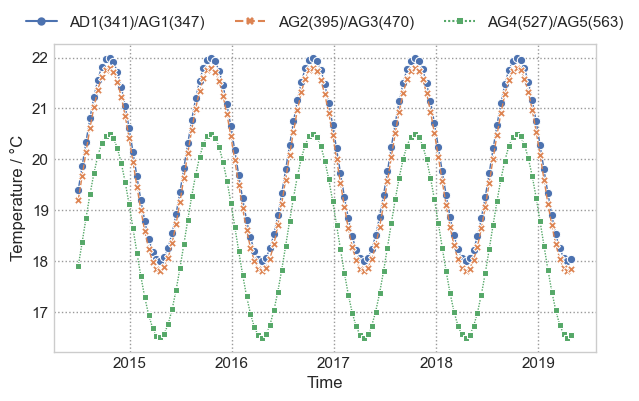

In [812]:
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax = sns.lineplot(data = Tem_langdao, x="age", y="temperature", style="id",hue = "id",
             markers=True,lw=1)
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
ax.set_xlabel("Time", fontsize = 12)
ax.set_ylabel("Temperature / °C", fontsize = 12)
fig = ax.get_figure()
plt.rcParams['figure.figsize']=(7,4)
fig.savefig("images/FusionModel_Fig4.png", dpi =300)

### Fig 5(a)

In [800]:
Fig5a = pyreadr.read_r('Fig5a.Rdata')
Fig5a.keys() # Check the names of all DataFrame imported from Rdata.

odict_keys(['lo_uT_sur'])

In [801]:
lo_uT_sur = Fig5a["lo_uT_sur"]

In [834]:
zip(lo_uT_sur.x, lo_uT_sur.y)

/Users/maxandchang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.



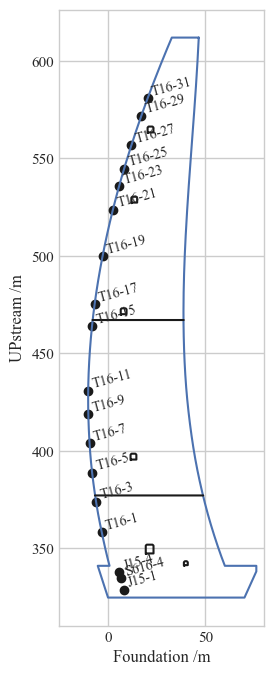

In [847]:
plt.style.use('seaborn-whitegrid')
plt.rcParams["font.family"] = "Times New Roman"
plt.scatter('x', 'y', data = lo_uT_sur, facecolors='k',edgecolors='k')
plt.plot('x',    'y', data = shape16, c = "b", linestyle='-')
plt.plot("Col1", "Col2", data = lo_16langdao1, c = "k",linestyle='-')
for x, y, z in zip(lo_uT_sur.x, lo_uT_sur.y, lo_uT_sur['index']):
    plt.text(x+3, y, z, 
            fontsize=10, ha='left', va='bottom', wrap=True,rotation=15)
plt.xlabel('Foundation /m')
plt.ylabel('UPstream /m')
plt.axis('scaled')
plt.xlim(-25,80)
plt.gcf().set_size_inches(4, 8) # Set the size of the figure.
plt.savefig('images/FusionModel_Fig5a.png', dpi=300) # Use "dpi" to increase the resolution of the saved figure.

### Fig 5(b)

#### Import data

In [789]:
uT_sur = pd.read_csv('Fig5b.txt', delimiter = "\t") # Import from .txt files
uT_sur["date"] = uT_sur["date"].apply(pd.to_datetime)
uT_sur.tail()

,index,date,age,temperature,x,y
31395,T16-9,2019-04-26,1761,18.772222,-10.0325,418.7
31396,T16-9,2019-04-27,1762,18.777778,-10.0325,418.7
31397,T16-9,2019-04-28,1763,18.783333,-10.0325,418.7
31398,T16-9,2019-04-29,1764,18.788889,-10.0325,418.7
31399,T16-9,2019-04-30,1765,18.794444,-10.0325,418.7


In [262]:
import seaborn.objects as so
from matplotlib import style
import matplotlib as mpl
import seaborn as sns

#### Method 1

In [323]:
from datetime import date
d0 = date(1970, 1, 1)
d1 = date(2014, 7, 1)
delta = d1 - d0
print('The number of days between the given range of dates is :')
print(delta.days)

The number of days between the given range of dates is :
16252


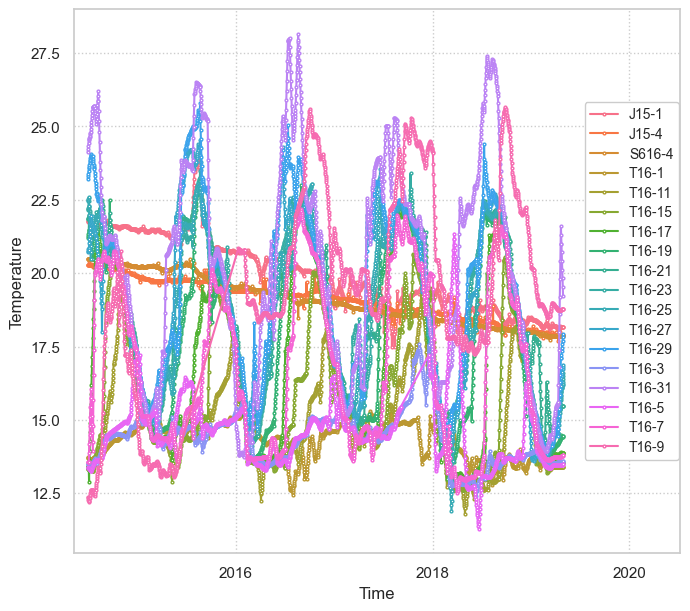

In [814]:
p = (
    so.Plot(data = uT_sur, x="date", y="temperature", color = "index")
    .add(so.Line(marker = "o", fillcolor="w", pointsize=2))
    .layout(engine="constrained")
    .theme({"grid.linestyle": ":",
            'legend.loc': 'lower right','legend.facecolor': 'w',
           #'figure.constrained_layout.h_pad': 0.1,
            'figure.constrained_layout.w_pad': 0.15,
            'legend.frameon': True,
            'legend.framealpha': 1,
            'axes.edgecolor': '0.8',
            'axes.facecolor': 'white',
            'grid.color': '0.8',
            'legend.edgecolor': '0.8',
            'axes.labelpad': 4,
            'legend.fontsize': 10.0,
            'legend.labelspacing': 0.4,
           # **style.library["seaborn-whitegrid"]
            # mpl.rcParams.keys()
           })
    .label(x="Time", y="Temperature", color="")
    .limit(x=(16200, 18450))
)
f = plt.figure(figsize=(7, 6))
p.on(f).show()
f.savefig("images/FusionModel_Fig5b.jpg", dpi = 300)

#### Method 2

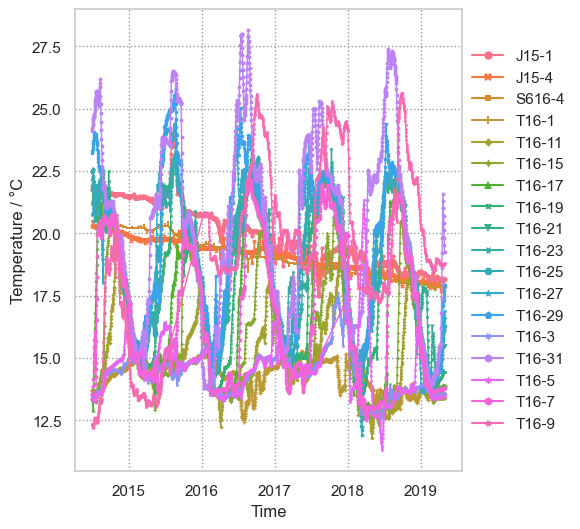

In [782]:
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax = sns.lineplot(
    data = uT_sur, x="date", y="temperature", hue = "index", markers=True, style = 'index',
    markeredgewidth=0.0, markersize = 3, dashes = False, lw = 1
)
#ax.add.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":", 'figure.figsize':(6.5,6)})
ax.set(xlabel='Time', ylabel='Temperature / °C')
sns.move_legend(ax, "right", bbox_to_anchor=(1.3, .5),title=None)
plt.rcParams['figure.figsize']=(5,6)
plt.savefig('images/FusionModel_Fig5b.png', dpi=300,bbox_inches='tight')

### Fig 6(a)

In [791]:
lo_dT_sur = pd.read_csv('Fig6a.txt', delimiter = "\t") # Import from .txt files
lo_dT_sur.tail()

,index,x,y
15,T16-24,41.4750,535.7
16,T16-26,42.1242,544.7
17,T16-28,42.9995,556.7
18,T16-30,44.1069,571.7
19,T16-32,44.1808,572.7


/Users/maxandchang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.



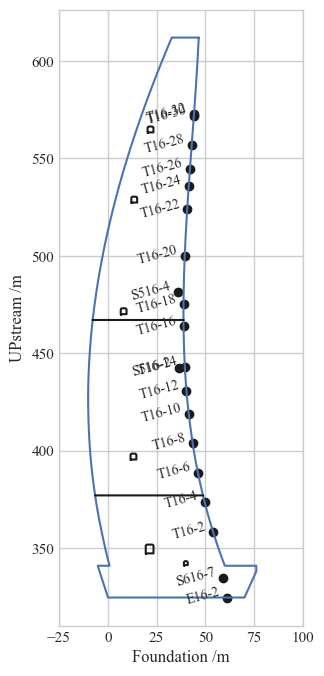

In [849]:
plt.style.use('seaborn-whitegrid')
plt.rcParams["font.family"] = "Times New Roman"
plt.scatter('x', 'y', data = lo_dT_sur, facecolors='k',edgecolors='k')
plt.plot('x',    'y', data = shape16, c = "b", linestyle='-')
plt.plot("Col1", "Col2", data = lo_16langdao1, c = "k",linestyle='-')
for x, y, z in zip(lo_dT_sur.x, lo_dT_sur.y, lo_dT_sur['index']):
    plt.text(x-3, y, z, 
            fontsize=10, ha='right', va='bottom', wrap=True,rotation=15)
plt.xlabel('Foundation /m')
plt.ylabel('UPstream /m')
plt.axis('scaled')
plt.xlim(-25,100)
plt.gcf().set_size_inches(4, 8) # Set the size of the figure.
plt.savefig('images/FusionModel_Fig6a.png', dpi=300) # Use "dpi" to increase the resolution of the saved figure.

In [795]:
dT_sur = pd.read_csv('Fig6b.txt', delimiter = "\t") # Import from .txt files
dT_sur["date"] = dT_sur["date"].apply(pd.to_datetime)
dT_sur.tail()

,index,date,age,temperature,x,y
33270,T16-8,2019-04-26,1761,21.774212,43.516,403.7
33271,T16-8,2019-04-27,1762,21.904711,43.516,403.7
33272,T16-8,2019-04-28,1763,22.035210,43.516,403.7
33273,T16-8,2019-04-29,1764,22.165709,43.516,403.7
33274,T16-8,2019-04-30,1765,22.296208,43.516,403.7


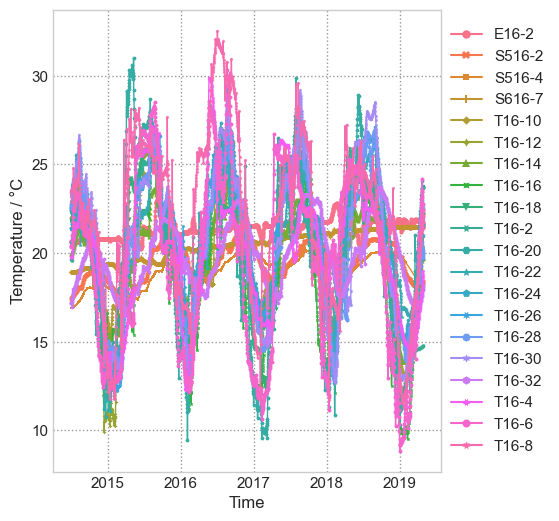

In [799]:
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax = sns.lineplot(
    data = dT_sur, x="date", y="temperature", hue = "index", markers=True, style = 'index',
    markeredgewidth=0.0, markersize = 3, dashes = False, lw = 1
)
#ax.add.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":", 'figure.figsize':(6.5,6)})
ax.set(xlabel='Time', ylabel='Temperature / °C')
sns.move_legend(ax, "right", bbox_to_anchor=(1.3, .5),title=None)
plt.rcParams['figure.figsize']=(5,6)
plt.savefig('images/FusionModel_Fig6b.png', dpi=300,bbox_inches='tight') 
# Compile twice

## Fig 7 

In [852]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import pandas as pd

In [ ]:
Cdata = {'x':[1,1.5,2.9,3,3.6,3.9,4.1],'y':[3,0.5,2.9,0.7,2.2,1.1,1.7]}

Camp = pd.dataframe(Cdata)

xr = list(range(1,5))
campAll = data.frame(Camp[xr,], cate = "Camp 1",starshape='circle')
campAll = rbind(campAll,data.frame(Camp[xr+1,],cate = "Camp 2",starshape='circle'))
campAll = rbind(campAll,data.frame(Camp[xr+2,],cate = "Camp 3",starshape='circle'))
campAll = rbind(campAll,data.frame(Camp[xr+3,],cate = "Camp 4",starshape='circle'))
campAll = rbind(campAll,data.frame(x=4.15,y=1.9,cate = 'target',starshape='pentagram'))